Here one can see that it is important to have an error measure that is not based on the cluster indexes and labels given from the data labels.
If so then there are errors based on the fact that there are different labels used.
But actually the clusters where found just a little bit differently labeled.
So we need a new evaluation method.
    
    
    

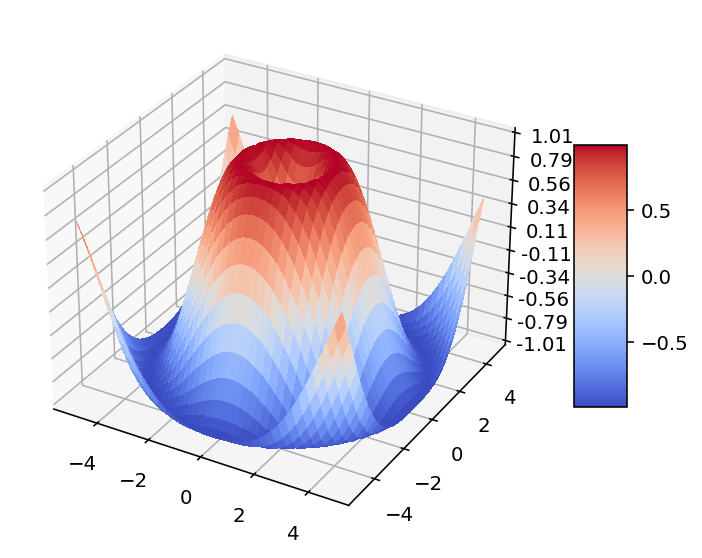

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.figsize = (2.4, 1.8)
fig.dpi = 142

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [1]:
import sys

# setting path
sys.path.append("../AntClust")


# setting path
# sys.path.append(directory.parent.parent)

# importing
# from parentdirectory.geeks import geek_method

# using
# geek_method()

In [2]:
# make AntClus dir known
import sys

sys.path.append("../AntClust")

# generally used
import random as rng

import numpy as np
from AntClust import AntClust

# AntClust
from distance_classes import similarity_1d
from rules import labroche_rules

In [3]:
def uniform_cluster_data_random(
    num_clusters,
    cluster_width,
    values_per_cluster_min=0,
    values_per_cluster_max=100,
    rng_seed=1,
):
    """
    Makes a series of numbers that can be clustered together.
    Each cluster is getting a pivot element, starting by one and counts to
    num_clusters. From this a random deviation is generated which will be
    the new data point. If the deviation is to larg there will be a string
    of numbers with no space in between and as such no clusters.
    cluster_width: how far can the data point be from its pivot,
    only values <0.25 makes sense.
    """
    # variables
    data = []
    labels = []

    rng.seed(rng_seed)
    rand_min = -cluster_width
    rand_max = cluster_width
    rand_range = rand_max - rand_min

    # make data for each cluster pivot
    for c_pivot in range(1, num_clusters + 1):
        c_data = []
        c_labels = []

        # how many values to generate?
        values_per_cluster = rng.randin(values_per_cluster_min, values_per_cluster_max)
        # generate data points
        for n in range(0, values_per_cluster):
            # calc pivot deviation and add it
            dp = [c_pivot + (rand_min + rng.random() * rand_range)]

            # check if exist and if create new
            while dp in c_data:
                dp = [c_pivot + (rand_min + rng.random() * rand_range)]

            # add it with the labe to the cluster data
            c_data.append(dp)
            c_labels.append(c_pivot - 1)

        # add the cluster data to overall data
        data = data + c_data
        labels = labels + c_labels

    return data, labels


def uniform_cluster_data(num_clusters, cluster_width, values_per_cluster, rng_seed=1):
    """
    Makes a series of numbers that can be clustered together.
    Each cluster is getting a pivot element, starting by one and counts to
    num_clusters. From this a random deviation is generated which will be
    the new data point. If the deviation is to larg there will be a string
    of numbers with no space in between and as such no clusters.
    cluster_width: how far can the data point be from its pivot,
    only values <0.25 makes sense.
    """
    # variables
    data = []
    labels = []

    rng.seed(rng_seed)
    rand_min = -cluster_width
    rand_max = cluster_width
    rand_range = rand_max - rand_min

    # make data for each cluster pivot
    for c_pivot in range(1, num_clusters + 1):
        c_data = []
        c_labels = []

        # generate data points
        for n in range(0, values_per_cluster):
            # calc pivot deviation and add it
            dp = [c_pivot + (rand_min + rng.random() * rand_range)]

            # check if exist and if create new
            while dp in c_data:
                dp = [c_pivot + (rand_min + rng.random() * rand_range)]

            # add it with the labe to the cluster data
            c_data.append(dp)
            c_labels.append(c_pivot - 1)

        # add the cluster data to overall data
        data = data + c_data
        labels = labels + c_labels

    return data, labels


# TODO: 
# - run with different seeds and take the mean error
def run_benchmark():
    # generate two for loops that generate the data and then run antclust
    # and save the error to a 2d list of lists
    
    return []

In [4]:
# ------------------
# data
# ------------------
num_clusters = 5
cluster_width = 0.1  # this defines how hard the clustering task is?
values_per_cluster = 100
data, labels = uniform_cluster_data(num_clusters, cluster_width, values_per_cluster, rng_seed=3)
data = np.array(data)
labels = np.array(labels)

# ------------------
# AntClust
# ------------------
# similarity function
f_sim = [similarity_1d(data.min(), data.max())]

# rules
rules = labroche_rules()

# AntClust
ant_clust = AntClust(data, f_sim, rules, alpha_ant_meeting_iterations=150)

# find clusters
ant_clust.find_clusters()

# get the clustering result
clusters_found = ant_clust.get_clusters()

# ------------------
# performance
# ------------------
# how many labels differ?
num_missclassified = len(np.where(clusters_found != labels)[0])
error = num_missclassified / len(data)
print(f'error: {error}')
clusters_found

AntClust: phase 1 of 3 -> meeting ants
left meetings  37500 / 37500
left meetings  33750 / 37500
left meetings  30000 / 37500
left meetings  26250 / 37500
left meetings  22500 / 37500
left meetings  18750 / 37500
left meetings  15000 / 37500
left meetings  11250 / 37500
left meetings  7500 / 37500
left meetings  3750 / 37500
AntClust: phase 2 of 3 -> shrink nests
AntClust: phase 3 of 3 -> reassign ants
error: 0.612


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4,

In [5]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,

In [6]:
data

array([[0.94759293],
       [1.00884585],
       [0.97399103],
       [1.02078401],
       [1.02514406],
       [0.91310577],
       [0.9026336 ],
       [1.06749382],
       [0.9518708 ],
       [0.94686619],
       [1.09912897],
       [0.9940527 ],
       [1.06729229],
       [0.99527064],
       [1.02781363],
       [0.93012328],
       [1.02697213],
       [1.07360906],
       [1.00463624],
       [1.04825037],
       [1.0342823 ],
       [0.91280629],
       [1.05164605],
       [1.01821992],
       [0.96025353],
       [0.90620235],
       [1.07310545],
       [0.99454982],
       [1.04376478],
       [1.07576256],
       [1.0428259 ],
       [1.08421973],
       [0.97899268],
       [1.06018175],
       [0.98892421],
       [1.08711734],
       [1.07577333],
       [0.91949086],
       [0.92719377],
       [0.94339739],
       [1.09309603],
       [0.98723237],
       [1.02532966],
       [0.96020524],
       [1.0014486 ],
       [0.97717325],
       [0.9701821 ],
       [1.017

In [7]:
a = [[1], [2]]
[1] in a

True

In [8]:
import random as rng

In [9]:
min = -0.25
max = 0.25

r = max - min


min + rng.random() * r

0.05658812683655701

In [10]:
min = 0.25
max = 0.5

r = max - min

min + 0.99999 * r

0.4999975

In [11]:
rng.randint(10, 100)

19

In [12]:
0.9999 * r

0.249975

In [13]:
from numpy import unique
from numpy import where
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.cluster import AffinityPropagation

# initialize the data set we'll work with
# ------------------
# data
# ------------------
num_clusters = 50
cluster_width = 0.1  # this defines how hard the clustering task is?
values_per_cluster = 100
data, labels = uniform_cluster_data(num_clusters, cluster_width, values_per_cluster, rng_seed=3)
data = np.array(data)
labels = np.array(labels)

# define the model
model = AffinityPropagation(damping=0.7)

# train the model
model.fit(data)

# assign each data point to a cluster
result = model.predict(data)

# get all of the unique clusters
clusters = unique(result)

# plot the clusters
#for cluster in clusters:
#    # get data points that fall in this cluster
#    index = where(result == cluster)
#    # make the plot
#    pyplot.scatter(training_data[index, 0], training_data[index, 1])
#
# show the plot
#pyplot.show()

/home/juppy/venv_evolution/lib64/python3.11/site-packages/sklearn/cluster/_affinity_propagation.py:143: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


In [17]:
clusters

array([   0,    1,    2, ..., 4530, 4531, 4532])

In [18]:
num_missclassified = len(np.where(result != labels)[0])
error = num_missclassified / len(data)
print(f'error: {error}')

error: 0.9798


In [19]:
result

array([   0,    0,    0, ..., 4530, 4531, 4532])